# Wykorzystanie rozkładów macierzy do rozwiązywania oznaczonych układów równań

Poznane na wykładzie rozkłady (faktoryzacje) macierzy możemy wykorzystać do rozwiązywania układów równań liniowych. Dzięki wykorzystaniu specjalnych własności macierzy występujących w rozkładzie jesteśmy w stanie w łatwiejszy sposób odwrócić macierz i tym samym zminimalizować błąd.


**Zadanie 1.**

Rozważmy układ równań $Ax=b$, w którym:
* $A$ jest macierzą Hilberta o wymiarach 15x15.
* $A$ jest macierzą wartości losowych z przedziału $[0,100]$ o wymiarach 100x100,  1000x1000 i 1000000x1000000.
* $b$ jest wektorem wartości losowych, odpowiednio, o wymiarach 15x1, 100x1, 1000x1 i 1000000x1.

1. Oblicz współczynnik uwarunkowania macierzy $A$ i oceń jej uwarunkowanie.
2. Rozwiąż układ równań następującymi metodami:
    * z użyciem jawnej odwrotności $A$.
    * korzystając z rozkładu [LU](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html) (uwaga na macierz permutacji!):
        * z wykorzystaniem odwrotności L i U.
        * z użyciem jedynie odwrotności i metody podstawiania wstecznego.
    * korzystając z rozkładu [QR](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html):
        * z wykorzystaniem odwrotności Q i R.
        * z użyciem jedynie odwrotności Q i metody podstawiania wstecznego.
    * za pomocą jednej z metod iteracyjnych z poprzedniego ćwiczenia.
    * za pomocą metody [`solve`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) z pakietu NumPy.
3. Porównaj otrzymane wyniki. W tym celu oblicz normy z residuuów otrzymanych dla każdego z rozwiązań. Którą z metod cechuje najwyższa dokladność?
4. Przeprowadź porównanie wydajności ww. metod. Zmierz czas wykonania każdej metody. Aby otrzymać bardziej sensowny wynik należy powtórzyć obliczenia w pętli (np. 100 lub 1000 razy) i uśrednić wynik. Do pomiaru czasu wykonania możesz wykorzystać pakiet `time`.
Wskazówka: Do rozwiązania układu z macierzą trójkątną możesz wykorzystać funkcję [`scipy.linalg.solve_triangular`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

        
        


# Interpolacja

**Zadanie 2.**

Przeprowadź interpolacje poniższych funkcji $f(x)$ za pomocą wielomianów interpolacyjnych Lagrange'a ([`scipy.interpolate.lagrange`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)). Stwórz wykresy funkcji interpolacyjnych i zaznacz na nich punkty, w ktorych dokonano oceny wartości funkcji.

Pierwsza funkcja:

* $f(0) = 1$,
* $f(0.25) = 1.64872$,
* $f(0.5) = 2.71828$,
* $f(0.75) = 4.48169.$

Oblicz $f(0.43)$.

Druga funkcja:

* $f_2(0.1) = 0.62049958$,
* $f_2(0.2) = -0.28398668$,
* $f_2(0.3) = 0.00660095$,
* $f_2(0.4) = 0.24842440$. 

Oblicz $f_2(0.25)$.

f(0.43) = 2.360604734079999


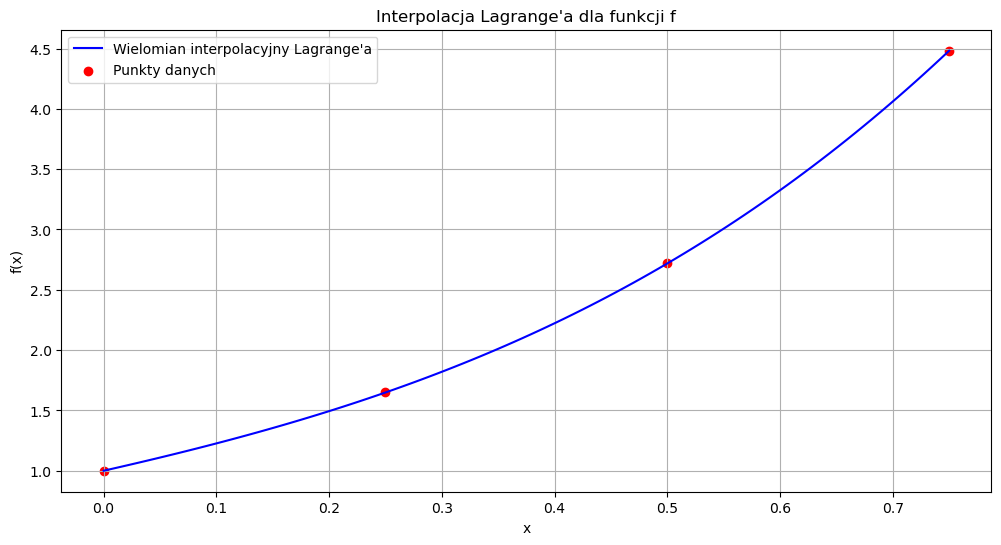

f_2(0.25) = -0.21033722187500237


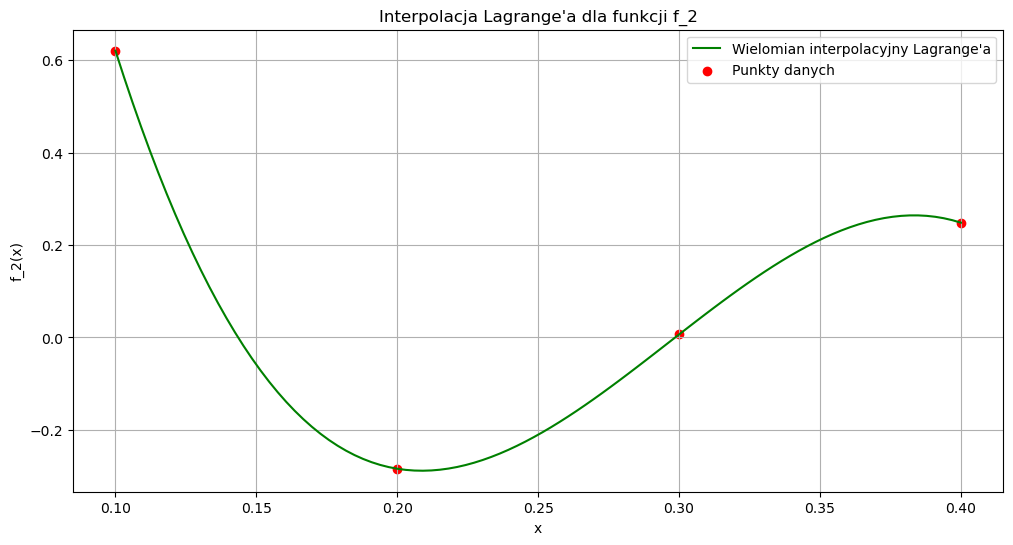

In [3]:
# Przeprowadź interpolacje poniższych funkcji $f(x)$ za pomocą wielomianów interpolacyjnych Lagrange'a ([`scipy.interpolate.lagrange`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)). Stwórz wykresy funkcji interpolacyjnych i zaznacz na nich punkty, w ktorych dokonano oceny wartości funkcji.
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x1 = np.array([0, 0.25, 0.5, 0.75])
y1 = np.array([1, 1.64872, 2.71828, 4.48169])

poly1 = lagrange(x1, y1)

f_0_43 = poly1(0.43)
print(f"f(0.43) = {f_0_43}")

x_values1 = np.linspace(0, 0.75, 100)
y_values1 = poly1(x_values1)

plt.figure(figsize=(12, 6))
plt.plot(x_values1, y_values1, label='Wielomian interpolacyjny Lagrange\'a', color='blue')
plt.scatter(x1, y1, color='red', label='Punkty danych')
plt.title('Interpolacja Lagrange\'a dla funkcji f')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

x2 = np.array([0.1, 0.2, 0.3, 0.4])
y2 = np.array([0.62049958, -0.28398668, 0.00660095, 0.24842440])

poly2 = lagrange(x2, y2)

f_2_0_25 = poly2(0.25)
print(f"f_2(0.25) = {f_2_0_25}")

x_values2 = np.linspace(0.1, 0.4, 100)
y_values2 = poly2(x_values2)

plt.figure(figsize=(12, 6))
plt.plot(x_values2, y_values2, label='Wielomian interpolacyjny Lagrange\'a', color='green')
plt.scatter(x2, y2, color='red', label='Punkty danych')
plt.title('Interpolacja Lagrange\'a dla funkcji f_2')
plt.xlabel('x')
plt.ylabel('f_2(x)')
plt.legend()
plt.grid()
plt.show()


***Zadanie 3.***

Rozważmy funkcję $f(x)=\frac{1}{25x^2+1}$. 

Przeprowadź interpolacje funkcji $f$ w przedziale $[-2,2]$ wielomianem Lagrange'a oraz funkcjami sklejanymi 3 stopnia w:
- 21 równoodległych węzłach,
- 21 węzłach [Czebyszewa](https://pl.wikipedia.org/wiki/Węzły_Czebyszewa).

**Wskazówka** Interpolację funkcjami sklejanymi możesz przeprowadzić za pomocą funkcji [`interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d).

Umieść wielomian interpolacyjny, oryginalną funkcję $f$ oraz węzly interpolacyjne na wspólnym wykresie (jeden wykres dla metody Lagrange'a oraz jeden dla funkcji sklejanych). Porównaj otrzymane rezultaty. Przeprowadź te same działania dla przedziału $x\in[-5,5]$. Jakie problemy możesz zauważyć na otrzymanych wykresach?

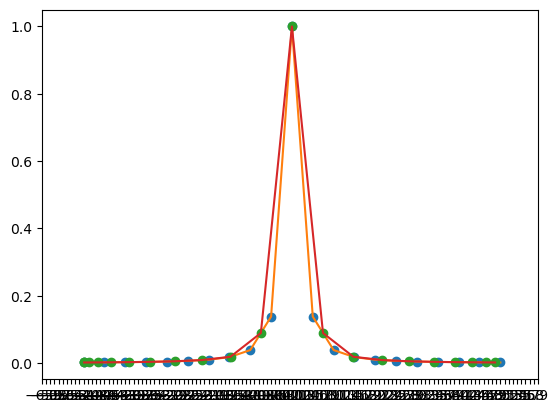

In [22]:
# ***Zadanie 3.***

# Rozważmy funkcję $f(x)=\frac{1}{25x^2+1}$. 

# Przeprowadź interpolacje funkcji $f$ w przedziale $[-2,2]$ wielomianem Lagrange'a oraz funkcjami sklejanymi 3 stopnia w:
# - 21 równoodległych węzłach,
# - 21 węzłach [Czebyszewa](https://pl.wikipedia.org/wiki/Węzły_Czebyszewa).

# **Wskazówka** Interpolację funkcjami sklejanymi możesz przeprowadzić za pomocą funkcji [`interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d).

# Umieść wielomian interpolacyjny, oryginalną funkcję $f$ oraz węzly interpolacyjne na wspólnym wykresie (jeden wykres dla metody Lagrange'a oraz jeden dla funkcji sklejanych). Porównaj otrzymane rezultaty. Przeprowadź te same działania dla przedziału $x\in[-5,5]$. Jakie problemy możesz zauważyć na otrzymanych wykresach?

from scipy import interpolate

def czebyszev_nodes(start, end, n):
    return [(start + end) / 2 + (end - start) / 2 * np.cos((2 * k + 1) / (2 * n) * np.pi) for k in range(1, n+1)]

def f(x):
    return 1 / (25 * x**2 + 1)

# x = np.linspace(-2, 2, 21)
# y = f(x)
# f = interpolate.interp1d(x, y)
# plt.plot(x, y, 'o', x, y, '-')
# # plt.show()

# x_czeb = czebyszev_nodes(-2, 2, 21)
# y_czeb = f(x_czeb)
# f_czeb = interpolate.interp1d(x_czeb, y_czeb)
# plt.plot(x_czeb, y_czeb, 'o', x_czeb, y_czeb, '-')
# plt.xticks(np.arange(-3, 3, step=0.1))
# plt.show()

x = np.linspace(-5, 5, 21)
y = f(x)
f = interpolate.interp1d(x, y)
plt.plot(x, y, 'o', x, y, '-')

x_czeb = czebyszev_nodes(-5, 5, 21)
y_czeb = f(x_czeb)
f_czeb = interpolate.interp1d(x_czeb, y_czeb)
plt.plot(x_czeb, y_czeb, 'o', x_czeb, y_czeb, '-')
plt.xticks(np.arange(-6, 6, step=0.1))
plt.show()

***Zadanie 4.***

Kierowca jadący z miasta A do miasta B, zauważywszy na drodze fotoradar, zaczął gwałtownie hamować. Przebieg jego położenia, zarejestrowany przez nawigację, pokazano w poniższej tabeli. Wiedząc, że radar znajduje się w punkcie o współrzędnej 79.6 m, oszacuj kiedy kierowca minął fotoradar (w tym celu skorzystaj z jednej z metod z laboratorium 3) oraz z jaką prędkością wtedy jechał (wykorzystaj relację drogi i prędkości znaną z fizyki). 

|czas \[s\]|położenie \[m\]|
|--|--|
|0.0|0.0|
|1.0|42.7|
|2.0|73.2|
|3.0|92.5|

In [20]:
# 
# Kierowca jadący z miasta A do miasta B, zauważywszy na drodze fotoradar, zaczął gwałtownie hamować. Przebieg jego położenia, zarejestrowany przez nawigację, pokazano w poniższej tabeli. Wiedząc, że radar znajduje się w punkcie o współrzędnej 79.6 m, oszacuj kiedy kierowca minął fotoradar (w tym celu skorzystaj z jednej z metod z laboratorium 3) oraz z jaką prędkością wtedy jechał (wykorzystaj relację drogi i prędkości znaną z fizyki). 

# |czas \[s\]|położenie \[m\]|
# |--|--|
# |0.0|0.0|
# |1.0|42.7|
# |2.0|73.2|
# |3.0|92.5|

x = np.array([0, 1, 2, 3])
y = np.array([0.0, 42.7, 73.2, 92.5])
poly = lagrange(x, y)

# wykorzystaj metode iteracji




SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (2348732640.py, line 14)

**Zadanie dla zainteresowanych programowaniem funkcyjnym w Pythonie**

Stwórz funkcję znajdującą wielomian interpolacyjny metodą Lagrange'a. Funkcja powinna przyjmować dwie listy:
* listę argumentów ($x$-ów)
* listę wartości ($y$-ów).  


Po wykonaniu obliczeń funkcja powinna zwracać wielomian w postaci obiektu typu **funkcja** (a nie `numpy.Polynomial`).

**Wskazówka** Wykorzystaj wyrażenia *lambda*. Dla ułatwienia możesz się też posłużyć pakietami `operator` i `functools`.
